In [1]:
#Import 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [3]:
#use this as a labeling tool 
art = 'test.jpg' # enter in path to image you want

In [1]:
#image = cv2.imread(art)
#print("The type of this input is {}".format(type(image)))
#print("Shape: {}".format(image.shape))
#plt.imshow(image)

In [2]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(image)

In [4]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [6]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

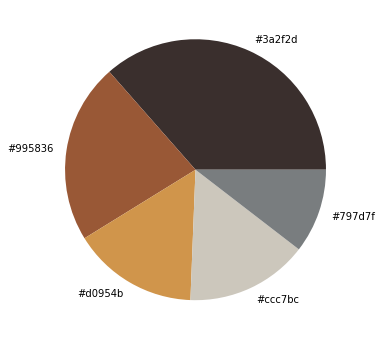

In [15]:
#run this to get the distribution of color that make up the image. 
#I chose to select the top 5 colors
#https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71
palette = get_colors(get_image('test.jpg'), 5, True)

[array([58.37019911, 47.66583322, 45.11265242]),
 array([152.98535167,  88.15518655,  54.18811734]),
 array([204.3239545 , 199.53481343, 188.67357257]),
 array([208.48059358, 149.41119117,  75.32405646]),
 array([120.97330883, 125.78890798, 127.5949974 ])]

In [ ]:
#some 3D ploting tools that may get used later. Also see 

In [94]:
#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt

#%matplotlib inline

In [95]:
#fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [96]:
#ax = fig.add_subplot(111, projection='3d')

In [97]:
#x = [219.20601653]
#y = [215.10650593]
#z = [210.51783394]

In [98]:
#ax.scatter(x,y,z,c = 'r', marker = 'o')
#ax.set_xlabel('x axis')
#ax.set_ylabel('y axis')
#ax.set_zlabel('z axis')

Text(0.5, 0, 'z axis')

In [99]:
#plt.show()